In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

## Pré-processamento dos Dados

In [4]:
import sklearn.preprocessing as pp

D = ds.load_iris()

X = D.data
y = D.target

print(X.shape)

(150, 4)


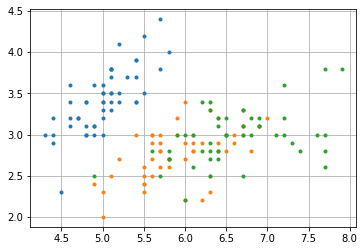

In [5]:
plt.plot(X[y==0, 0], X[y==0, 1], '.')
plt.plot(X[y==1, 0], X[y==1, 1], '.')
plt.plot(X[y==2, 0], X[y==2, 1], '.')
plt.axis('scaled')
plt.grid(True)

In [6]:
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


In [7]:
sc = pp.StandardScaler().fit(X)
Xn = sc.transform(X)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


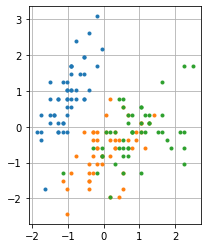

In [8]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

In [9]:
rs = pp.RobustScaler().fit(X)
Xn = rs.transform(X)

[ 0.03333333  0.11466667 -0.16914286 -0.06711111]
[0.63484715 0.86882194 0.50268688 0.50646175]


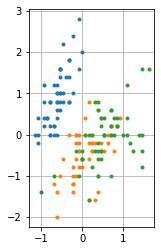

In [10]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

In [11]:
mm = pp.MinMaxScaler().fit(X)
Xn = mm.transform(X)

[0.4287037  0.44055556 0.46745763 0.45805556]
[0.22925036 0.18100457 0.29820408 0.31653859]


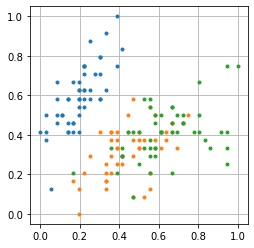

In [12]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

In [13]:
nn = pp.Normalizer().fit(X)
Xn = nn.transform(X)

nX = np.sqrt(np.sum(Xn**2, axis=1))
print(nX[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


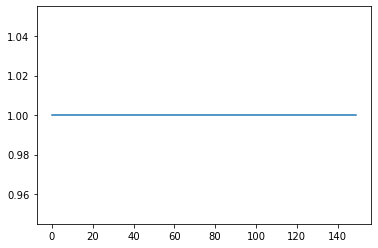

In [14]:
plt.plot(nX)

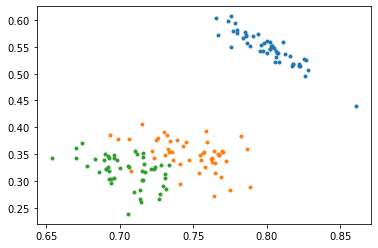

In [15]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')

In [16]:
X2 = X[:, :2]
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

(-1.0, 1.0, -1.0, 1.0)

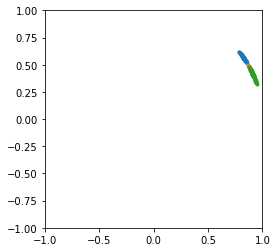

In [17]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])

In [18]:
X2 = X[:, :2]
sc = pp.StandardScaler().fit(X2)
X3 = sc.transform(X2)
nn = pp.Normalizer().fit(X3)
Xn = nn.transform(X3)

(-1.0, 1.0, -1.0, 1.0)

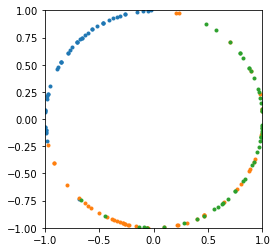

In [19]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])

In [20]:
X2 = X[:, :2]
sc = pp.MinMaxScaler().fit(X2)
X3 = sc.transform(X2)
nn = pp.Normalizer().fit(X3)
Xn = nn.transform(X3)

(-1.0, 1.0, -1.0, 1.0)

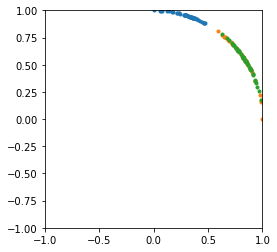

In [21]:
plt.plot(Xn[y==0, 0], Xn[y==0, 1], '.')
plt.plot(Xn[y==1, 0], Xn[y==1, 1], '.')
plt.plot(Xn[y==2, 0], Xn[y==2, 1], '.')
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])

In [22]:
from mpl_toolkits.mplot3d import Axes3D

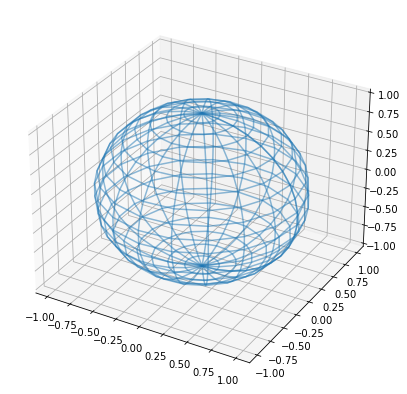

In [23]:
u, v = np.mgrid[0 : 2 * np.pi : 20j, 0 : np.pi : 20j]
gx = np.cos(u) * np.sin(v)
gy = np.sin(u) * np.sin(v)
gz = np.cos(v)

fl = plt.figure(figsize=(7, 7))
ax = fl.add_subplot(111, projection='3d')
ax.plot_wireframe(gx, gy, gz, alpha=0.5,)

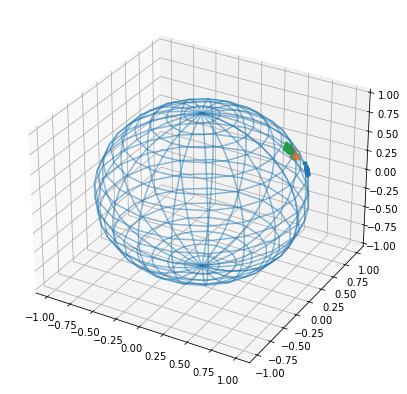

In [24]:
u, v = np.mgrid[0 : 2 * np.pi : 20j, 0 : np.pi : 20j]
gx = np.cos(u) * np.sin(v)
gy = np.sin(u) * np.sin(v)
gz = np.cos(v)

fl = plt.figure(figsize=(7, 7))
ax = fl.add_subplot(111, projection='3d')
ax.plot_wireframe(gx, gy, gz, alpha=0.5,)

X2 = X[:, :3]
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

ax.plot(Xn[y==0, 0], Xn[y==0, 1], Xn[y==0, 2], '.')
ax.plot(Xn[y==1, 0], Xn[y==1, 1], Xn[y==1, 2], '.')
ax.plot(Xn[y==2, 0], Xn[y==2, 1], Xn[y==2, 2], '.')

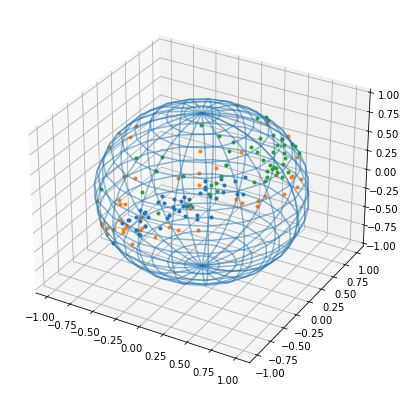

In [25]:
u, v = np.mgrid[0 : 2 * np.pi : 20j, 0 : np.pi : 20j]
gx = np.cos(u) * np.sin(v)
gy = np.sin(u) * np.sin(v)
gz = np.cos(v)

fl = plt.figure(figsize=(7, 7))
ax = fl.add_subplot(111, projection='3d')
ax.plot_wireframe(gx, gy, gz, alpha=0.5,)

X2 = X[:, :3]
sc = pp.StandardScaler().fit(X2)
X2 = sc.transform(X2)
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

ax.plot(Xn[y==0, 0], Xn[y==0, 1], Xn[y==0, 2], '.')
ax.plot(Xn[y==1, 0], Xn[y==1, 1], Xn[y==1, 2], '.')
ax.plot(Xn[y==2, 0], Xn[y==2, 1], Xn[y==2, 2], '.')

## Base de Dados MNIST - Imagens de Dígitos Manuscritos

In [26]:
import pickle
D = pickle.load(open('PreparacaoLaboratorio3/MNISTsmall.p', 'rb'))

In [30]:
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [35]:
X = D['X']
y = D['trueClass']

print(X.shape)

(784, 15000)


In [36]:
X4 = X[:, y==4]

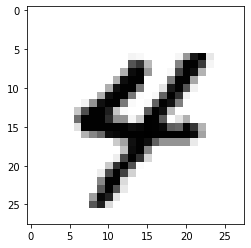

In [41]:
a = np.reshape(X4[:, 13], (28, 28))
plt.imshow(a, cmap='binary', interpolation=None)

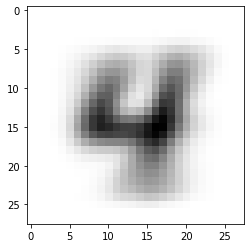

In [42]:
amean = np.reshape(np.mean(X4, axis=1), (28, 28))
plt.imshow(amean, cmap='binary', interpolation=None)

In [43]:
print(X.dtype)

X = X * 1.0

print(X.dtype)

uint8
float64


## Matrizes de Correlação

(-16.821577318008924, 16.39353793973189, -9.949392425610194, 9.893832954192762)

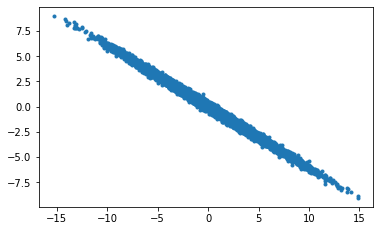

In [46]:
x = np.random.randn(2, 10000)
A = np.random.randn(2, 2) * 2
x2 = np.dot(A, x)

plt.plot(x2[0, :], x2[1, :], '.')
plt.axis('scaled')

(-50.46473195402677,
 49.18061381919567,
 -29.848177276830583,
 29.681498862578287)

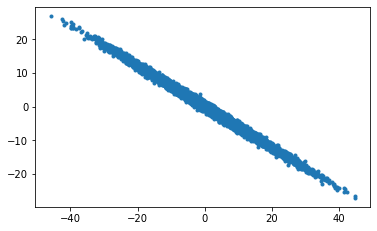

In [47]:
x3 = 3 * x2


plt.plot(x3[0, :], x3[1, :], '.')
plt.axis('scaled')

In [49]:
print("Cov x2")
print(np.cov(x2))
print()
print("Cov x3")
print(np.cov(x3))

Cov x2
[[ 17.25180635 -10.50538211]
 [-10.50538211   6.44142548]]

Cov x3
[[155.26625718 -94.54843902]
 [-94.54843902  57.97282928]]


In [50]:
print("Matriz de Correlacao x2")
print(np.corrcoef(x2))
print()
print("Matriz de Correlacao x3")
print(np.corrcoef(x3))

Matriz de Correlacao x2
[[ 1.         -0.99656028]
 [-0.99656028  1.        ]]

Matriz de Correlacao x3
[[ 1.         -0.99656028]
 [-0.99656028  1.        ]]


In [52]:
C0 = np.cov(X[:, y==0])
C1 = np.cov(X[:, y==1])
C2 = np.cov(X[:, y==2])
C3 = np.cov(X[:, y==3])
C4 = np.cov(X[:, y==4])
C5 = np.cov(X[:, y==5])
C6 = np.cov(X[:, y==6])
C7 = np.cov(X[:, y==7])
C8 = np.cov(X[:, y==8])
C9 = np.cov(X[:, y==9])

In [53]:
S0 = np.corrcoef(X[:, y==0])
S1 = np.corrcoef(X[:, y==1])
S2 = np.corrcoef(X[:, y==2])
S3 = np.corrcoef(X[:, y==3])
S4 = np.corrcoef(X[:, y==4])
S5 = np.corrcoef(X[:, y==5])
S6 = np.corrcoef(X[:, y==6])
S7 = np.corrcoef(X[:, y==7])
S8 = np.corrcoef(X[:, y==8])
S9 = np.corrcoef(X[:, y==9])

C:\Users\fabio\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\fabio\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [55]:
print(C0[:10, :10])
print()
print(S0[:10, :10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


(-0.5, 783.5, 783.5, -0.5)

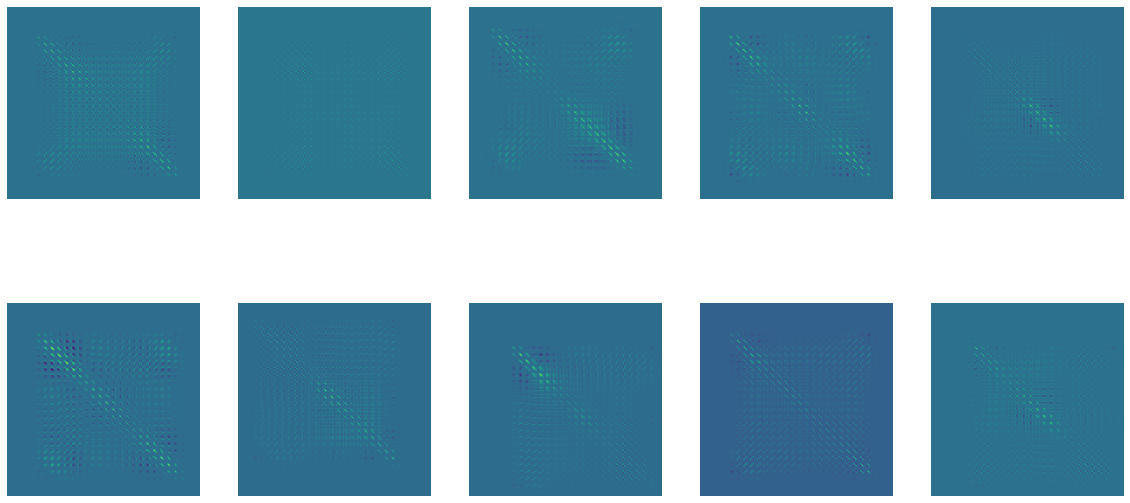

In [58]:
plt.figure(figsize=(20, 10))

plt.subplot(251)
plt.imshow(C0)
plt.axis('off')

plt.subplot(252)
plt.imshow(C1)
plt.axis('off')

plt.subplot(253)
plt.imshow(C2)
plt.axis('off')

plt.subplot(254)
plt.imshow(C3)
plt.axis('off')

plt.subplot(255)
plt.imshow(C4)
plt.axis('off')

plt.subplot(256)
plt.imshow(C5)
plt.axis('off')

plt.subplot(257)
plt.imshow(C6)
plt.axis('off')

plt.subplot(258)
plt.imshow(C7)
plt.axis('off')

plt.subplot(259)
plt.imshow(C8)
plt.axis('off')

plt.subplot(2, 5, 10)
plt.imshow(C9)
plt.axis('off')

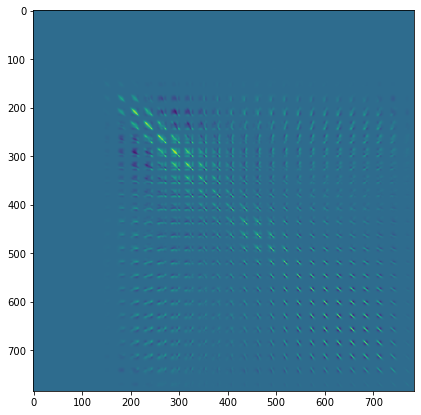

In [60]:
plt.figure(figsize=(7, 7))
plt.imshow(C7)

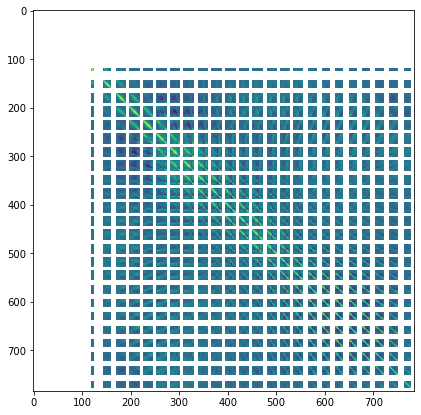

In [61]:
plt.figure(figsize=(7, 7))
plt.imshow(S7)

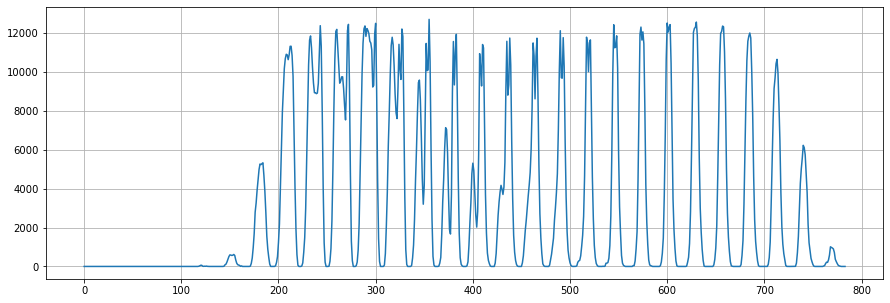

In [65]:
v = np.diag(C7)
plt.figure(figsize=(15, 5))
plt.plot(v)
plt.grid(True)

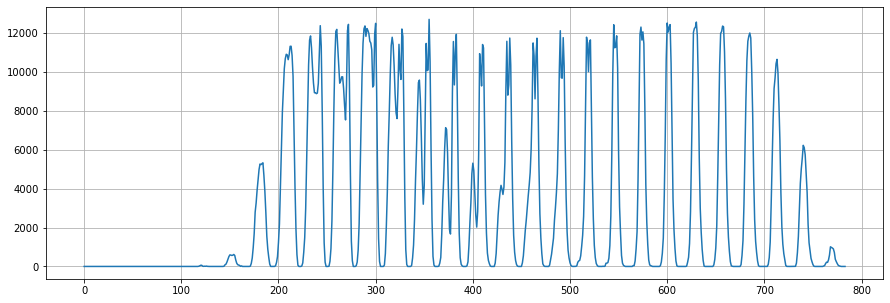

In [67]:
v = np.var(X[:, y==7], axis=1)
plt.figure(figsize=(15, 5))
plt.plot(v)
plt.grid(True)

Text(0.5, 1.0, '9')

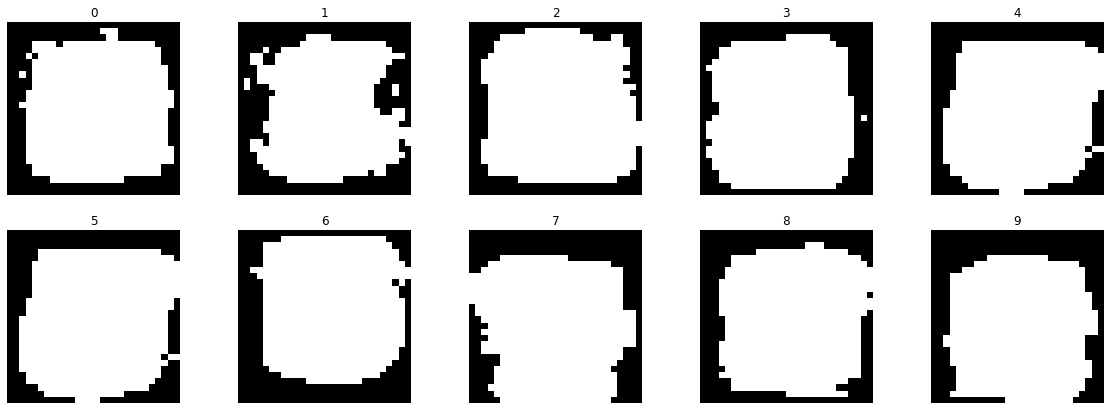

In [74]:
z0 = (np.diag(C0)==0) * 1
z1 = (np.diag(C1)==0) * 1
z2 = (np.diag(C2)==0) * 1
z3 = (np.diag(C3)==0) * 1
z4 = (np.diag(C4)==0) * 1
z5 = (np.diag(C5)==0) * 1
z6 = (np.diag(C6)==0) * 1
z7 = (np.diag(C7)==0) * 1
z8 = (np.diag(C8)==0) * 1
z9 = (np.diag(C9)==0) * 1

plt.figure(figsize=(20, 7))

plt.subplot(2, 5, 1)
plt.imshow(z0.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(0)

plt.subplot(2, 5, 2)
plt.imshow(z1.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(1)

plt.subplot(2, 5, 3)
plt.imshow(z2.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(2)

plt.subplot(2, 5, 4)
plt.imshow(z3.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(3)

plt.subplot(2, 5, 5)
plt.imshow(z5.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(4)

plt.subplot(2, 5, 6)
plt.imshow(z5.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(5)

plt.subplot(2, 5, 7)
plt.imshow(z6.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(6)

plt.subplot(2, 5, 8)
plt.imshow(z7.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(7)

plt.subplot(2, 5, 9)
plt.imshow(z8.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(8)

plt.subplot(2, 5, 10)
plt.imshow(z9.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(9)

In [77]:
sc = pp.StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T

print(X.shape)
print(X2.shape)

(784, 15000)
(784, 15000)


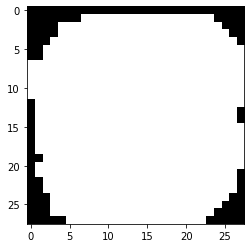

In [81]:
v = np.var(X2, axis=1)
plt.imshow(v.reshape(28, 28), cmap='gray')

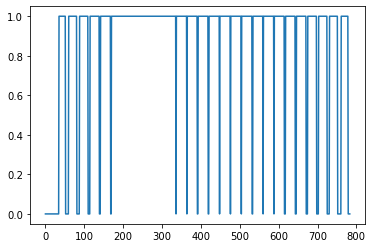

In [82]:
plt.plot(v)

## Análise em Componentes Principais (PCA)

In [83]:
Cx = np.cov(X)

print(Cx.shape)

(784, 784)


In [87]:
import scipy.linalg as la

u, W = la.eig(Cx)

print(u.shape)
print(W.shape)

(784,)
(784, 784)


In [90]:
print(u[:10])
print()
print(np.imag(u).max())

[330558.51704739+0.j 238434.37874637+0.j 207202.87800607+0.j
 181957.99452673+0.j 163052.59910849+0.j 145744.77031844+0.j
 110779.66975381+0.j  97394.84286729+0.j  94612.65326775+0.j
  78118.82806291+0.j]

1.2895506333585758e-14


[330558.51704739 238434.37874637 207202.87800607 181957.99452673
 163052.59910849 145744.77031844 110779.66975381  97394.84286729
  94612.65326775  78118.82806291]


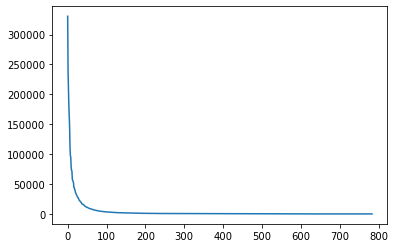

In [103]:
u = u.real
W = W.real

print(u[:10])
plt.plot(u)

<ipython-input-95-40b6e2dac937>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(u))
<ipython-input-95-40b6e2dac937>:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(u))


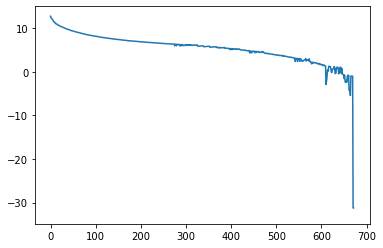

In [95]:
plt.plot(np.log(u))

In [97]:
idx = np.argsort(-u)
u = u[idx]
W = W[:, idx]

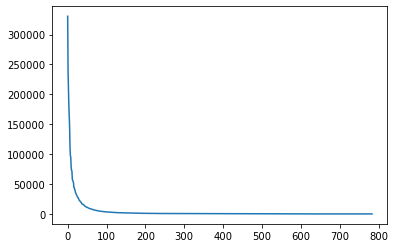

In [98]:
plt.plot(u)

<ipython-input-100-40b6e2dac937>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(u))
<ipython-input-100-40b6e2dac937>:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(u))


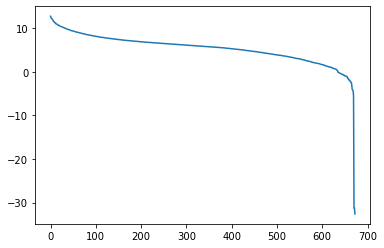

In [100]:
plt.plot(np.log(u))

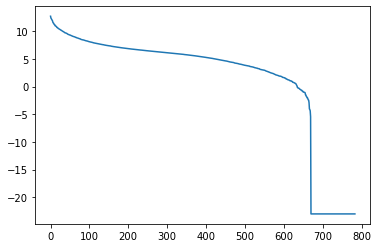

In [102]:
plt.plot(np.log(u + 1e-10))

In [128]:
un = u / np.sum(u)
L = np.cumsum(un)

print(np.sum(L <= 0.90))
print(np.sum(L <= 0.95))
print(np.sum(L <= 0.99))

86
151
326


In [129]:
m = np.mean(X, axis=1)[:, np.newaxis]
Xn = X - m
W2 = W[:, :50]
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2, Xp) + m

print(Xp.shape)
print(Xr.shape)

(50, 15000)
(784, 15000)


-64.46284698340064 288.8157982147508


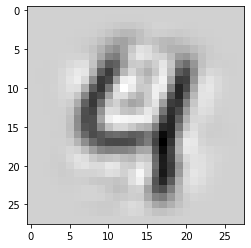

In [130]:
x = Xr[:, 7000].reshape(28, 28)
plt.imshow(x, cmap='binary')
print(x.min(), x.max())

In [132]:
X.dtype

dtype('float64')

In [136]:
x = x - x.min()
x = x / x.max() * 255

print(x.min(), x.max())

0.0 255.0


#### Outra forma de reescalar

In [137]:
x = np.clip(x, 0, 255)

print(x.min(), x.max())

0.0 255.0


### Para 50 amostras

0.0 255.0


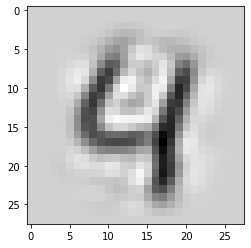

In [138]:
X = X * 1.0

m = np.mean(X, axis=1)[:, np.newaxis]
Xn = X - m
W2 = W[:, :50]
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2, Xp) + m

x = Xr[:, 7000].reshape(28, 28)

x = x - x.min()
x = x / x.max() * 255

plt.imshow(x.astype('uint8'), cmap='binary')
print(x.min(), x.max())

### Para 150 amostras

0.0 255.0


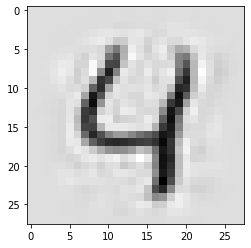

In [140]:
X = X * 1.0

m = np.mean(X, axis=1)[:, np.newaxis]
Xn = X - m
W2 = W[:, :150]
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2, Xp) + m

x = Xr[:, 7000].reshape(28, 28)

x = x - x.min()
x = x / x.max() * 255

plt.imshow(x.astype('uint8'), cmap='binary')
print(x.min(), x.max())

## Classificação com k-vizinhos + próximos

In [157]:
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
X2 = X[:, f2]

y1 = y[f1]
y2 = y[f2]

In [159]:
import scipy.linalg as la

Cx = np.cov(X1)
u, V = la.eig(Cx)

u = u.real
V = V.real

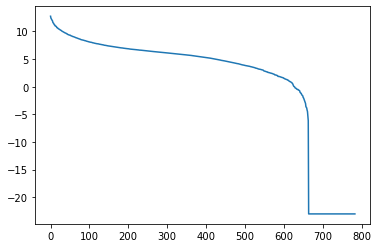

In [161]:
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]
plt.plot(np.log(u+1e-10))

In [162]:
print(np.sum(u >= 1e-10))

664


In [163]:
W = V[:, :664]

In [167]:
m = np.mean(X1, axis = 1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)

print(X1p.shape)

(664, 10000)


#### Com isto normalizamos a variância

In [169]:
s = np.std(X1p, axis=1)
print(s[:10])

[586.00518804 493.42306958 461.38830872 434.07789728 405.52569402
 387.78533176 335.16926737 317.54195021 310.15556184 282.8773864 ]


In [176]:
Xtmp = (X1p.T / s).T

print(Xtmp.shape)
print(np.std(Xtmp, axis=1)[:10])

(664, 10000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Outra forma

In [179]:
s = np.std(X1p, axis=1)
S = np.diag(1/s)
X1p = np.dot(S, X1p)

print(np.std(X1p, axis=1)[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Para os Dados de Teste

In [182]:
X2n = X2 - m #Esta média é a dos dados de treino, não percebo porquê
X2p = np.dot(S, np.dot(W.T, X2n))

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from plotMatriz import plotMatriz

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

7.140000000000001
[[496   0   1   0   0   1   2   0   0   0]
 [  0 495   1   2   0   0   2   0   0   0]
 [  7  11 452   7   1   0   3  18   1   0]
 [  0   1   1 461   1  13   2   9   7   5]
 [  0   5   0   0 460   0   3   2   1  29]
 [  3   3   0  13   2 466   3   2   3   5]
 [  8   3   0   0   3   4 481   0   1   0]
 [  0  22   3   2   4   1   0 456   0  12]
 [  5   3   6  27   4  16   6   7 421   5]
 [  3   6   1   6  12   3   1  11   2 455]]


In [188]:
W = V[:, :100]
m = np.mean(X1, axis=1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)
X2n = X2 - m
X2p = np.dot(W.T, X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

6.6000000000000005
[[495   0   1   0   0   1   3   0   0   0]
 [  0 496   1   2   0   0   1   0   0   0]
 [  6   6 459   7   1   0   2  17   2   0]
 [  0   1   2 461   1  12   2   9   8   4]
 [  0   4   1   0 460   0   3   1   1  30]
 [  3   2   1  13   3 462   4   2   6   4]
 [  5   3   0   0   1   3 487   0   1   0]
 [  0  20   3   1   3   1   0 463   0   9]
 [  4   2   6  24   5  13   7   3 432   4]
 [  4   6   1   5  10   3   1  11   4 455]]


In [190]:
W = V[:, :50]
m = np.mean(X1, axis=1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)
X2n = X2 - m
X2p = np.dot(W.T, X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

6.239999999999999
[[496   0   1   0   0   1   2   0   0   0]
 [  0 494   1   3   0   0   1   0   0   1]
 [  5   5 459   9   1   0   2  16   3   0]
 [  0   0   3 459   1  13   2   8  10   4]
 [  0   4   0   0 464   0   4   0   1  27]
 [  4   2   0  10   1 468   3   2   7   3]
 [  7   3   0   0   1   1 487   0   1   0]
 [  0  18   5   2   4   0   0 460   0  11]
 [  3   0   5  18   2  10   8   4 445   5]
 [  4   5   2   4  14   2   1   4   8 456]]


In [191]:
W = V[:, :40]
m = np.mean(X1, axis=1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)
X2n = X2 - m
X2p = np.dot(W.T, X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

5.86
[[496   0   1   0   0   0   3   0   0   0]
 [  0 494   1   2   0   0   2   0   0   1]
 [  4   3 465   9   1   0   3  12   3   0]
 [  0   1   2 459   1  14   2   8  10   3]
 [  0   1   0   0 465   0   5   0   1  28]
 [  4   2   0   9   1 470   5   2   3   4]
 [  7   3   0   0   1   1 487   0   1   0]
 [  0  17   8   2   4   0   0 459   0  10]
 [  2   0   3  18   2  10   7   4 450   4]
 [  3   6   1   5  12   3   1   3   4 462]]


In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100,whiten=True).fit(X1.T)
X1p = pca.transform(X1.T)

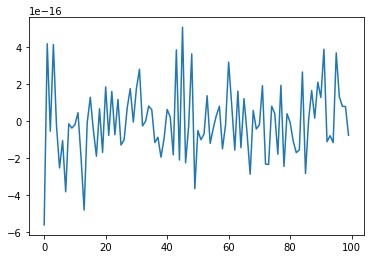

In [194]:
plt.plot(np.mean(X1p, axis=0))

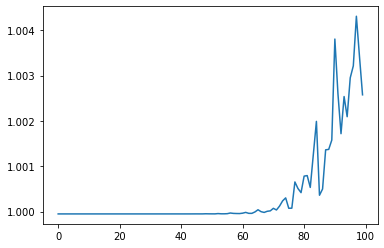

In [195]:
plt.plot(np.std(X1p, axis=0))

In [197]:
pca = PCA(n_components=100).fit(X1.T)
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

6.64
[[495   0   1   0   0   1   3   0   0   0]
 [  0 496   1   2   0   0   1   0   0   0]
 [  6   6 459   7   1   0   2  17   2   0]
 [  0   1   2 462   1  12   2   9   7   4]
 [  0   4   1   0 461   0   3   1   1  29]
 [  3   2   0  14   2 462   4   4   6   3]
 [  5   3   0   0   1   3 487   0   1   0]
 [  0  20   3   1   4   1   0 461   0  10]
 [  4   1   7  25   5  13   9   3 429   4]
 [  3   6   1   5  10   3   1  11   4 456]]


In [199]:
pca = PCA(n_components=40).fit(X1.T)
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2, y2e)
#plotMatriz(CM)
print(np.sum(y2 != y2e) / 5000 * 100)
print(CM)

5.92
[[496   0   1   0   0   0   3   0   0   0]
 [  0 494   1   2   0   0   2   0   0   1]
 [  4   3 464   9   1   0   3  13   3   0]
 [  0   1   2 458   1  14   2   9  10   3]
 [  0   1   0   0 466   0   5   0   1  27]
 [  4   2   0   9   1 470   5   2   3   4]
 [  7   3   0   0   1   1 487   0   1   0]
 [  0  17   8   2   4   0   0 458   0  11]
 [  2   0   3  18   2  10   7   4 450   4]
 [  3   6   2   5  12   3   1   3   4 461]]


## Análise em Discriminantes Lineares (LDA)

### Duas classes: dígitos "0" e "1"

In [200]:
from sklearn.decomposition import PCA
import scipy.linalg as la

In [206]:
D = pickle.load(open('PreparacaoLaboratorio3/MNISTsmall.p', 'rb'))

X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
X2 = X[:, f2]
y1 = y[f1]
y2 = y[f2]

Xa = X1[:, y1 == 0]
Xb = X1[:, y1 == 1]
X01 = np.hstack((Xa, Xb)) #Dados de Treino (784x2000)
y1 = np.hstack((np.zeros(1000), np.ones(1000)))

Xa = X2[:, y2 == 0]
Xb = X2[:, y2 == 1]
X01t = np.hstack((Xa, Xb)) #Dados de Teste (784, 1000)
y2 = np.hstack((np.zeros(500), np.ones(500)))

In [208]:
m0 = np.mean(X01[:, y1 == 0], axis=1)
m1 = np.mean(X01[:, y1 == 1], axis=1)

C0 = np.cov(X01[:, y1 == 0])
C1 = np.cov(X01[:, y1 == 1])

In [210]:
#w = np.dot(la.inv(C0+C1), m0-m1) #-> Erro: Singular Matrix

In [216]:
w = np.dot(la.pinv(C0+C1), m0-m1)

print(w.shape)

(784,)


-25.387944490302406


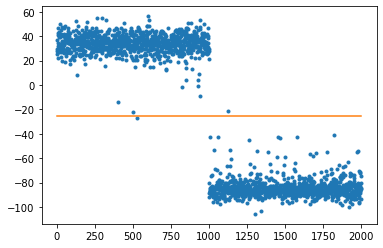

In [218]:
X01p = np.dot(w.T, X01)
l = (np.dot(w, m0) + np.dot(w, m1)) / 2
print(l)
plt.plot(X01p,'.')
plt.plot([0, 2000], [l, l])

In [233]:
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
X2 = X[:, f2]
y1 = y[f1]
y2 = y[f2]

Xa = X1[:, y1 == 0]
Xb = X1[:, y1 == 1]
X01 = np.hstack((Xa, Xb)) #Dados de Treino (784x2000)
y1 = np.hstack((np.zeros(1000), np.ones(1000)))

Xa = X2[:, y2 == 0]
Xb = X2[:, y2 == 1]
X01t = np.hstack((Xa, Xb)) #Dados de Teste (784, 1000)
y2 = np.hstack((np.zeros(500), np.ones(500)))

pca = PCA(n_components=1-1e-15, whiten=True).fit(X01.T)
X01p = pca.transform(X01.T).T
print(X01p.shape)

(500, 2000)


In [234]:
m0 = np.mean(X01p[:, y1 == 0], axis=1)
m1 = np.mean(X01p[:, y1 == 1], axis=1)

C0 = np.cov(X01p[:, y1 == 0])
C1 = np.cov(X01p[:, y1 == 1])

In [235]:
w = np.dot(la.pinv(C0+C1), m0-m1)
w = w / np.sqrt(np.sum(w**2)) #Normalizar os dados

print(w.shape)
print(np.sqrt(np.sum(w**2)))

(500,)
1.0


1.1102230246251565e-16


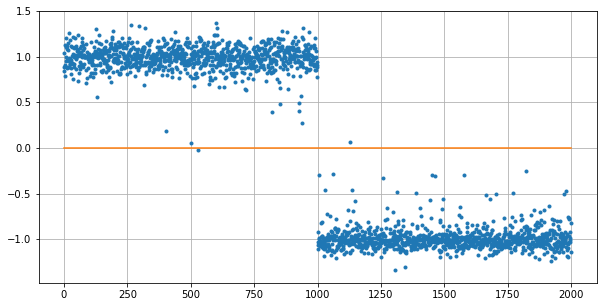

In [237]:
X01q = np.dot(w.T, X01p)
l = (np.dot(w, m0) + np.dot(w, m1)) / 2
print(l)

plt.figure(figsize=(10, 5))
plt.plot(X01q,'.')
plt.plot([0, 2000], [l, l])
plt.grid(True)

#### Descobrir os erros

In [248]:
y1e = (X01q < 0) * 1
idx = np.argwhere(y1 != y1e).squeeze()

print(idx)

[ 527 1127]


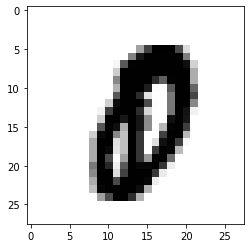

In [247]:
z = X01[:, 527].reshape((28, 28))
plt.imshow(z, cmap='binary')

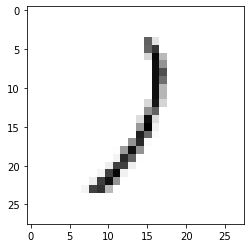

In [244]:
z = X01[:, 1127].reshape((28, 28))
plt.imshow(z, cmap='binary')

#### Fim dos Erros

### Para o conjunto de Teste

(0.0, 1000.0, -2.0, 2.0)

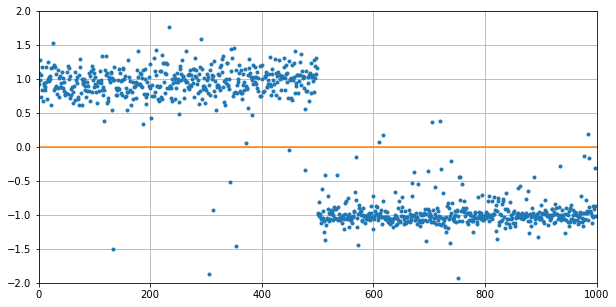

In [254]:
X01tp = pca.transform(X01t.T).T
X01tq = np.dot(w.T, X01tp)
#l = (np.dot(w, m0) + np.dot(w, m1)) / 2
#print(l)

plt.figure(figsize=(10, 5))
plt.plot(X01tq,'.')
plt.plot([0, 1000], [l, l])
plt.grid(True)
plt.axis([0, 1000, -2, 2])

#### Descobrir os erros do Conjunto de Teste

In [255]:
y2e = (X01tq < 0) * 1
idx = np.argwhere(y2 != y2e).squeeze()

print(idx)

[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


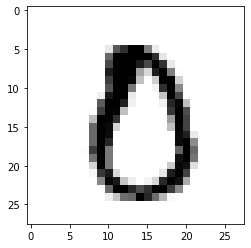

In [257]:
z = X01[:, 24].reshape((28, 28))
plt.imshow(z, cmap='binary')

## LDA 5 classes: "0", "1", "2", "3" e "4"

In [258]:
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
X2 = X[:, f2]
y1 = y[f1]
y2 = y[f2]

idx = (y1 == 0) | (y1 == 1) | (y1 == 2) | (y1 == 3) | (y1 == 4) 
X1 = X1[:, idx]
y1 = y1[idx]

idx = (y2 == 0) | (y2 == 1) | (y2 == 2) | (y2 == 3) | (y2 == 4)
X2 = X2[:, idx]
y2 = y2[idx]

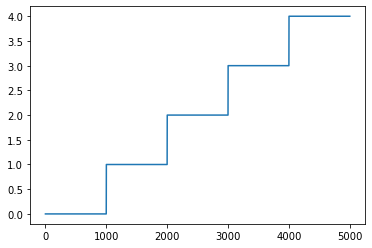

In [259]:
plt.plot(y1)

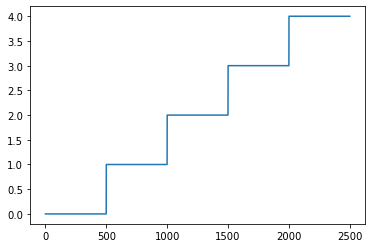

In [260]:
plt.plot(y2)

In [262]:
pca = PCA(n_components=1-1e-15, whiten=True).fit(X1.T)
X1 = pca.transform(X1.T).T
print(X1.shape) #604 dimensoes

(604, 5000)


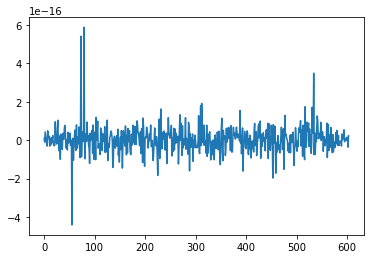

In [264]:
plt.plot(np.mean(X1, axis=1))

In [271]:
m0 = np.mean(X1[:, y1==0], axis=1)[:, np.newaxis]
print(m0.shape)

S0 = np.dot(m0, m0.T)
print(S0.shape)

m1 = np.mean(X1[:, y1==1], axis=1)[:, np.newaxis]
S1 = np.dot(m1, m1.T)

m2 = np.mean(X1[:, y1==2], axis=1)[:, np.newaxis]
S2 = np.dot(m2, m2.T)

m3 = np.mean(X1[:, y1==3], axis=1)[:, np.newaxis]
S3 = np.dot(m3, m3.T)

m4 = np.mean(X1[:, y1==4], axis=1)[:, np.newaxis]
S4 = np.dot(m4, m4.T)

S = S0 + S1 + S2 + S3 + S4

(604, 1)
(604, 604)


In [272]:
C0 = np.cov(X1[:, y1 == 0])
C1 = np.cov(X1[:, y1 == 1])
C2 = np.cov(X1[:, y1 == 2])
C3 = np.cov(X1[:, y1 == 3])
C4 = np.cov(X1[:, y1 == 4])

C = C0 + C1 + C2 + C3 + C4

In [274]:
import scipy.linalg as la

v, V = la.eig(np.dot(la.pinv(C), S))

v = v.real
V = V.real

In [275]:
idx = np.argsort(-v)
V = V[:, idx]
W = V[:, :4]

(604, 5000)


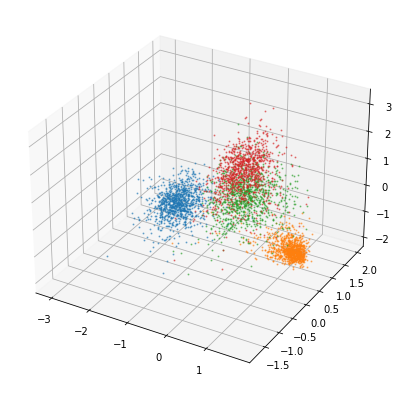

In [279]:
from mpl_toolkits.mplot3d import Axes3D

f1 = plt.figure(figsize=(7, 7))
ax = f1.add_subplot(111, projection='3d')
X1p = np.dot(W.T, X1)

print(X1.shape)

ax.plot(X1p[0, y1==0], X1p[1, y1==0], X1p[2, y1==0], '.', ms=2, alpha=0.5)
ax.plot(X1p[0, y1==1], X1p[1, y1==1], X1p[2, y1==1], '.', ms=2, alpha=0.5)
ax.plot(X1p[0, y1==2], X1p[1, y1==2], X1p[2, y1==2], '.', ms=2, alpha=0.5)
ax.plot(X1p[0, y1==3], X1p[1, y1==3], X1p[2, y1==3], '.', ms=2, alpha=0.5)

In [288]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from plotMatriz import plotMatriz

X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1].T
X2 = X[:, f2].T
y1 = y[f1]
y2 = y[f2]

In [289]:
pca = PCA(n_components=1-1e-15).fit(X1)
X1a = pca.transform(X1)
X2a = pca.transform(X2)

In [290]:
lda = LinearDiscriminantAnalysis().fit(X1a, y1)
X1b = lda.transform(X1a)
X2b = lda.transform(X2a)

In [293]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X1b, y1)
y2e = knn.predict(X2b)

In [295]:
CM = confusion_matrix(y2, y2e)

In [298]:
print('knn: ', np.sum(y2 != y2e), np.sum(y2 != y2e) / y2.shape[0] * 100)
print(CM)

knn:  813 16.259999999999998
[[475   0   3   1   1   7   6   1   4   2]
 [  0 480   2   4   0   5   4   1   4   0]
 [  6  14 399  18   7   2  13  13  24   4]
 [  2   1  16 401   1  40   1  18  12   8]
 [  0   1   5   6 426   0  11   5   5  41]
 [  6   2   4  22   7 391   9   7  39  13]
 [  9   8   9   1  15  27 424   1   6   0]
 [  0  13  10  18  13   1   0 408   4  33]
 [  5  12  14  20   8  29   8   8 384  12]
 [  5   3   4   7  47   4   0  15  16 399]]


In [303]:
y2e = lda.predict(X2a)
CM = confusion_matrix(y2, y2e)
print('lda: ', np.sum(y2 != y2e), np.sum(y2 != y2e) / y2.shape[0] * 100)
rint(CM)

lda:  943 18.86
[[469   1   0   2   4   8   7   0   7   2]
 [  0 480   3   3   2   2   3   0   6   1]
 [  5  33 349  25   9   5  24   9  35   6]
 [  2   5   9 408   1  27   2  13  21  12]
 [  0   3   3   1 437   3   7   2   4  40]
 [  7   4   4  36  16 368   5   9  33  18]
 [ 10   9   9   0  29  31 401   0  11   0]
 [  2  29  10   6  22   1   0 371   2  57]
 [  6  24   7  21  14  25   8   7 375  13]
 [  3   7   2   9  45   2   1  20  12 399]]


In [306]:
print("Dimensões com Variância maior que 0: ", X1a.shape[1])
print("Dimensões Usadas: ", X1b.shape[1])
print("Perdemos muita Informação")

Dimensões com Variância maior que 0:  664
Dimensões Usadas:  9
Perdemos muita Informação
